In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

import warnings 
warnings.filterwarnings(action = 'ignore')

In [2]:
salarytrain_data = pd.read_csv('SalaryData_Train.csv')
salarytrain_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
salarytest_data = pd.read_csv('SalaryData_Test.csv')
salarytest_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
salarytrain_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
salarytest_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
salarytrain_data.shape

(30161, 14)

In [8]:
salarytest_data.shape

(15060, 14)

In [9]:
salarytrain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
salarytest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
salarytrain_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
salarytest_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

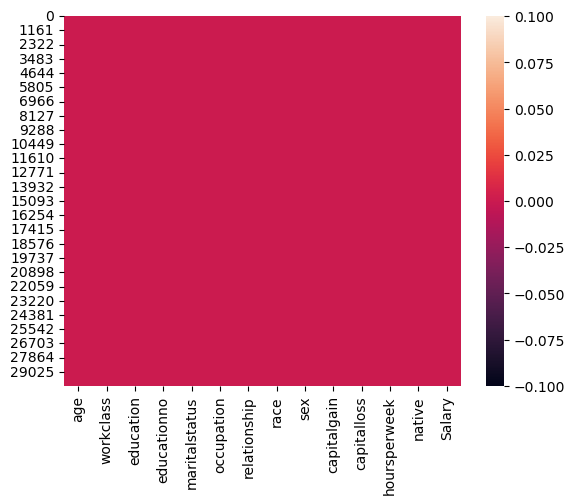

In [13]:
sns.heatmap(salarytrain_data.isnull())
plt.show()

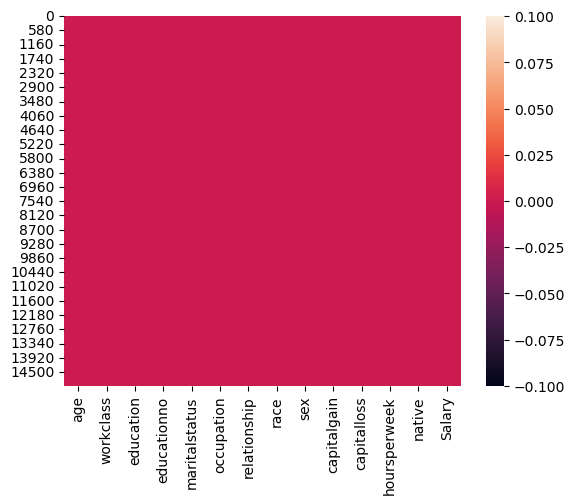

In [14]:
sns.heatmap(salarytest_data.isnull())
plt.show()

In [15]:
salarytrain_data.head().T

,0,1,2,3,4
age,39,50,38,53,28
workclass,State-gov,Self-emp-not-inc,Private,Private,Private
education,Bachelors,Bachelors,HS-grad,11th,Bachelors
educationno,13,13,9,7,13
maritalstatus,Never-married,Married-civ-spouse,Divorced,Married-civ-spouse,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial,Handlers-cleaners,Handlers-cleaners,Prof-specialty
relationship,Not-in-family,Husband,Not-in-family,Husband,Wife
race,White,White,White,Black,Black
sex,Male,Male,Male,Male,Female
capitalgain,2174,0,0,0,0


In [16]:
salarytest_data.head().T

,0,1,2,3,4
age,25,38,28,44,34
workclass,Private,Private,Local-gov,Private,Private
education,11th,HS-grad,Assoc-acdm,Some-college,10th
educationno,7,9,12,10,6
maritalstatus,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,Other-service
relationship,Own-child,Husband,Husband,Husband,Not-in-family
race,Black,White,White,Black,White
sex,Male,Male,Male,Male,Male
capitalgain,0,0,0,7688,0


This creates a new figure on which plot will appear:-

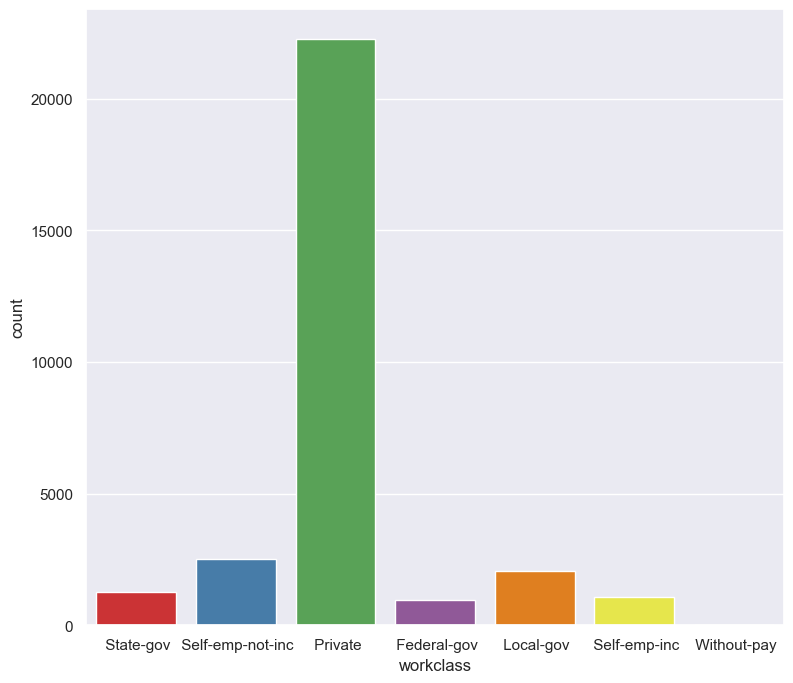

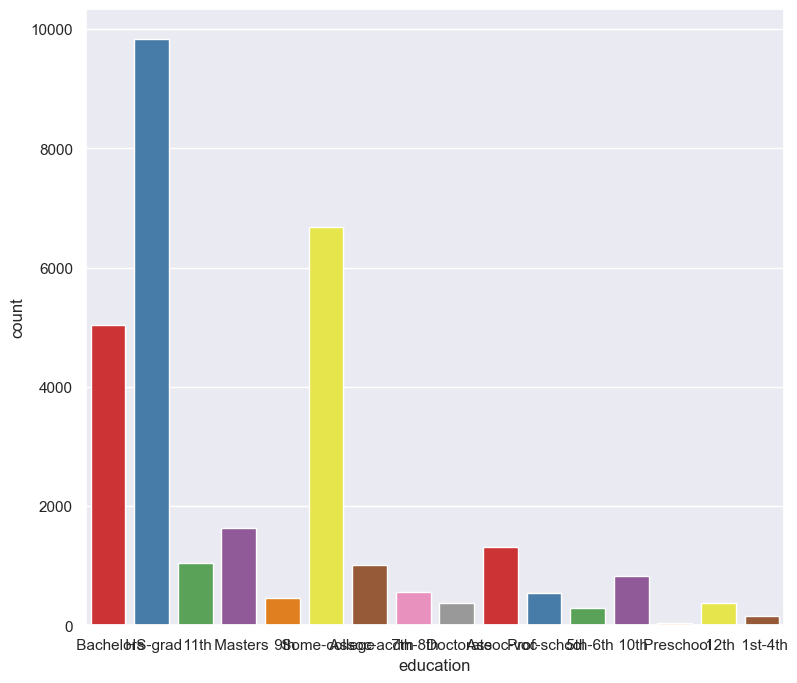

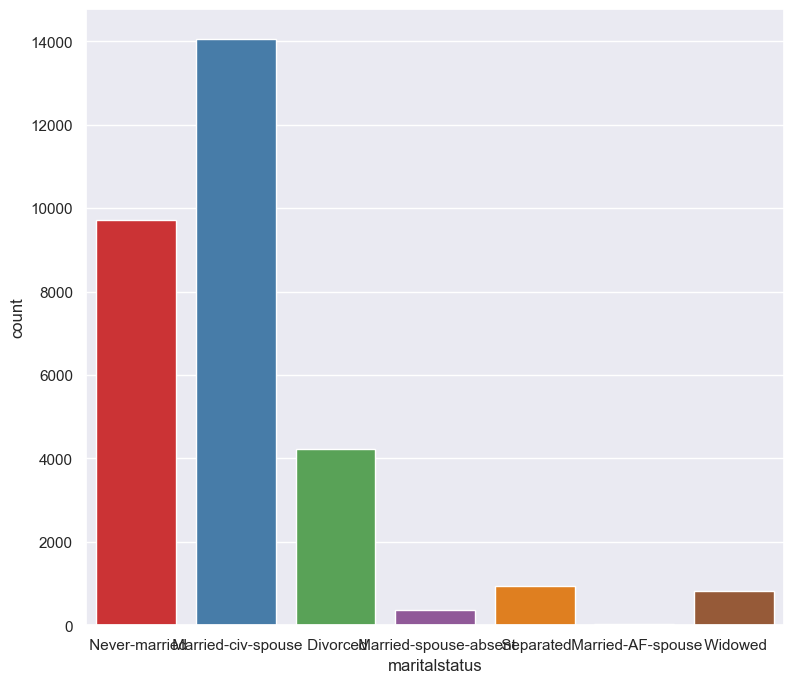

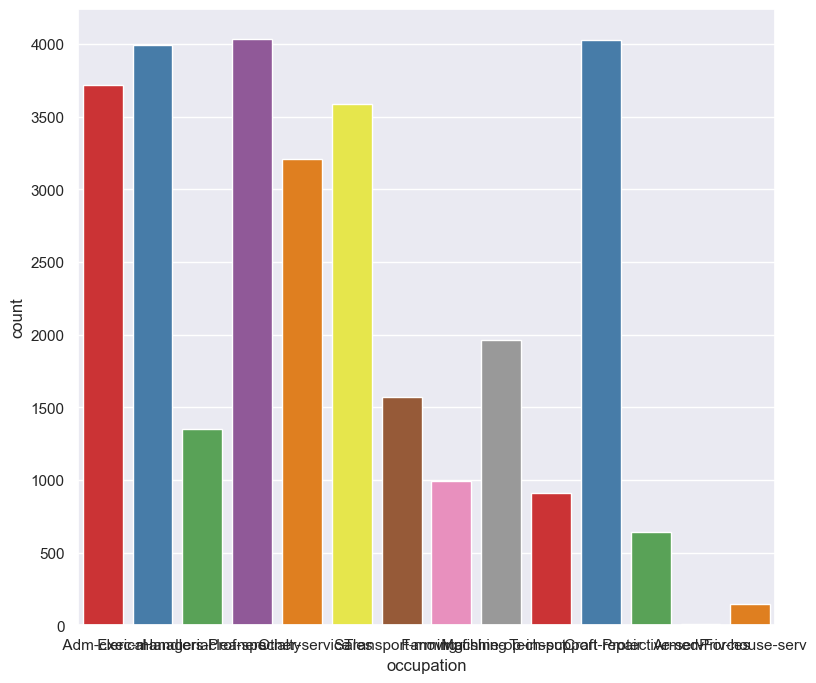

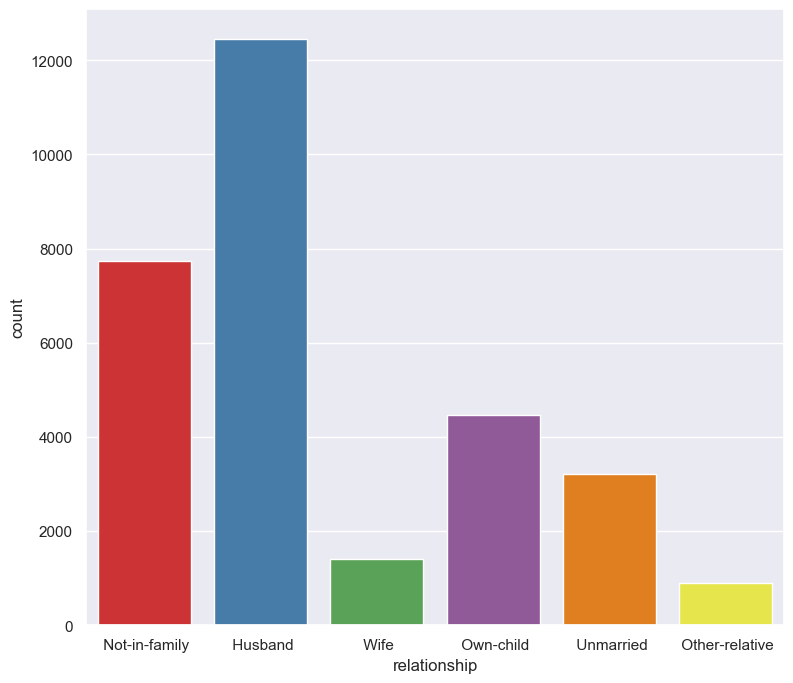

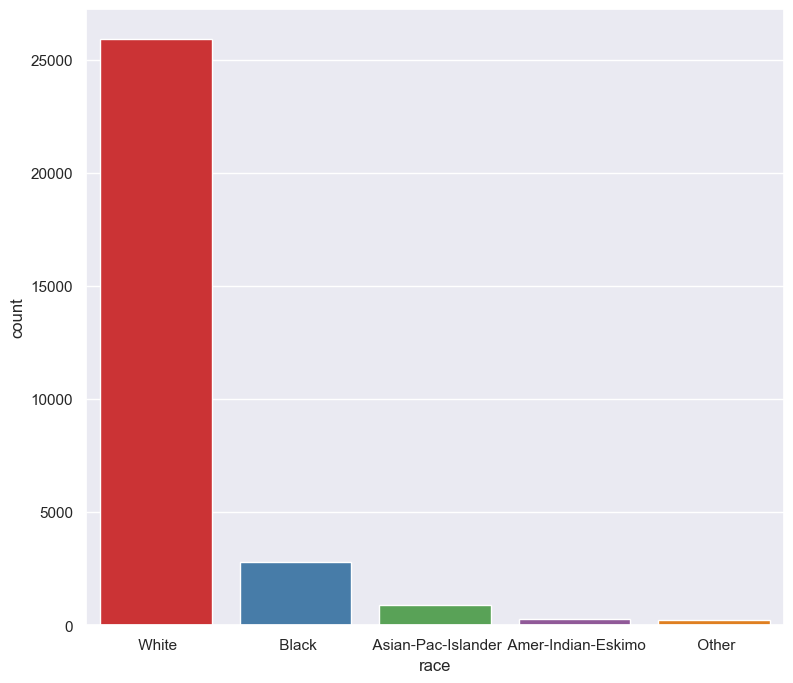

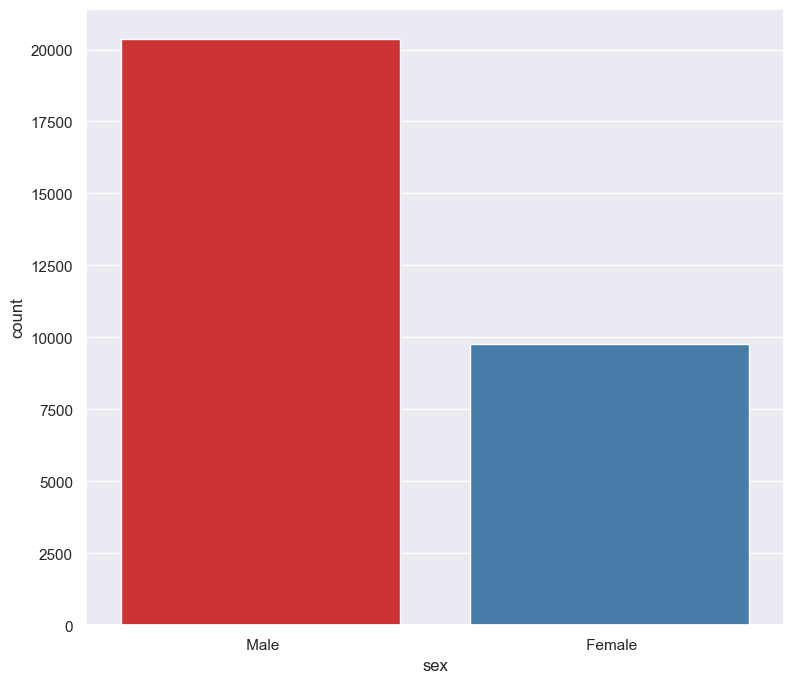

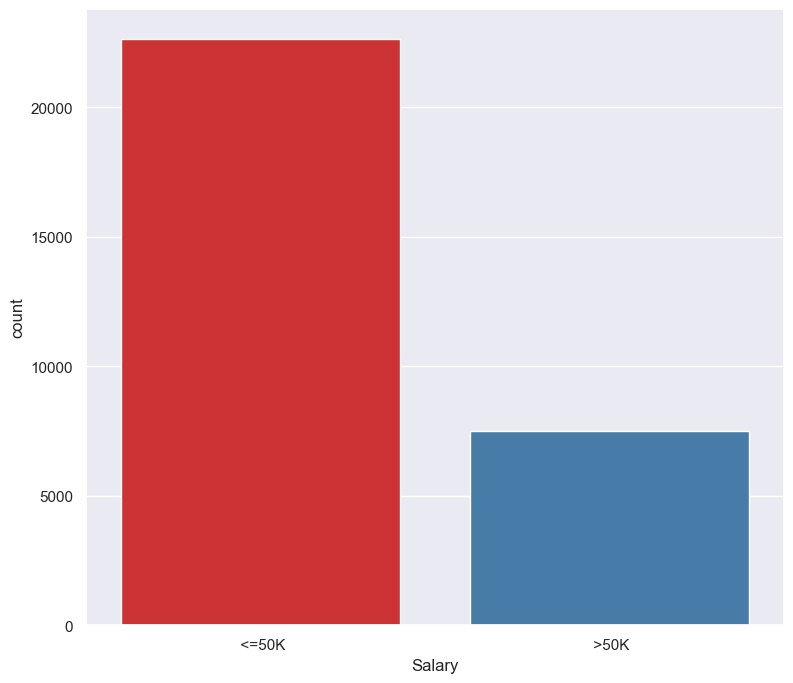

In [17]:
sns.set(rc={'figure.figsize':(9,8)})
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure() 
    sns.countplot(x = col, data = salarytrain_data, palette = 'Set1');

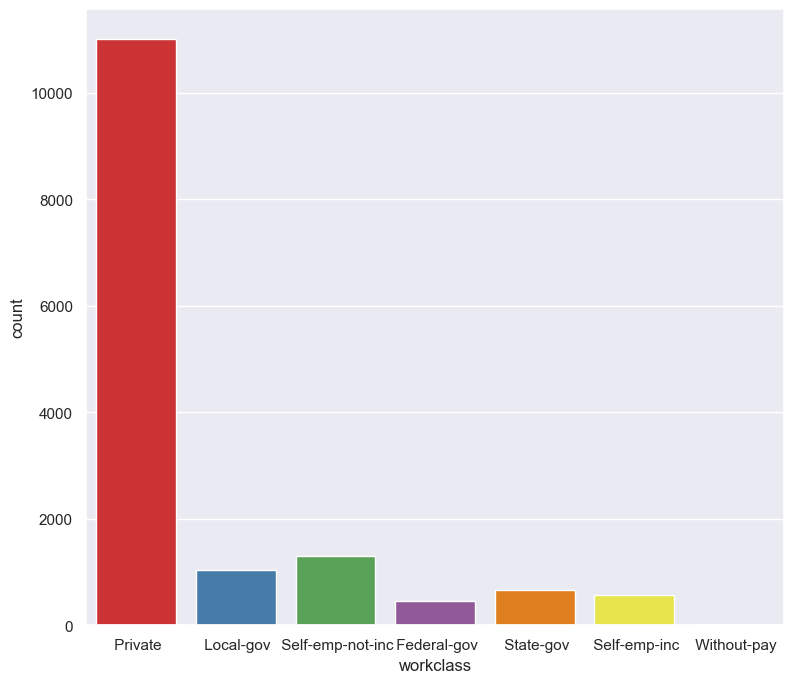

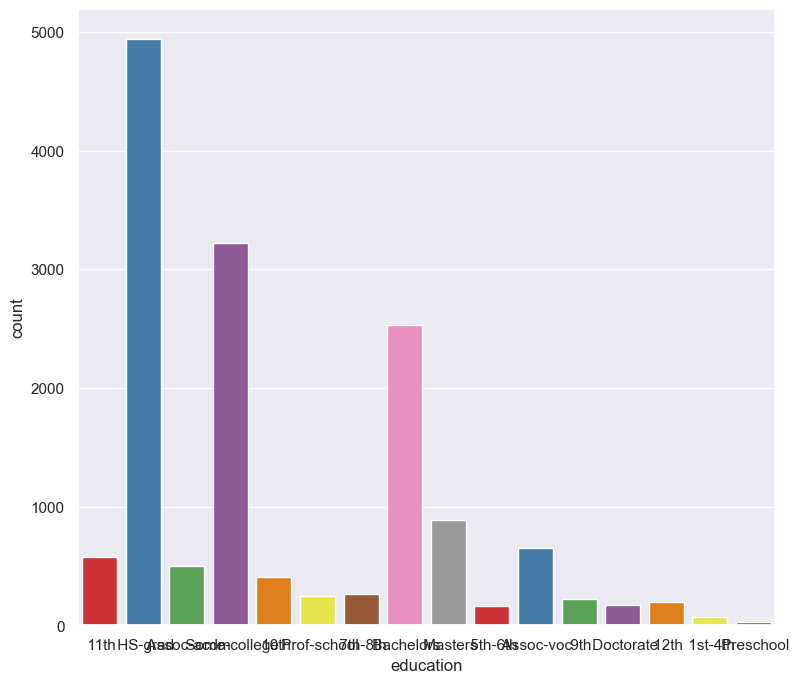

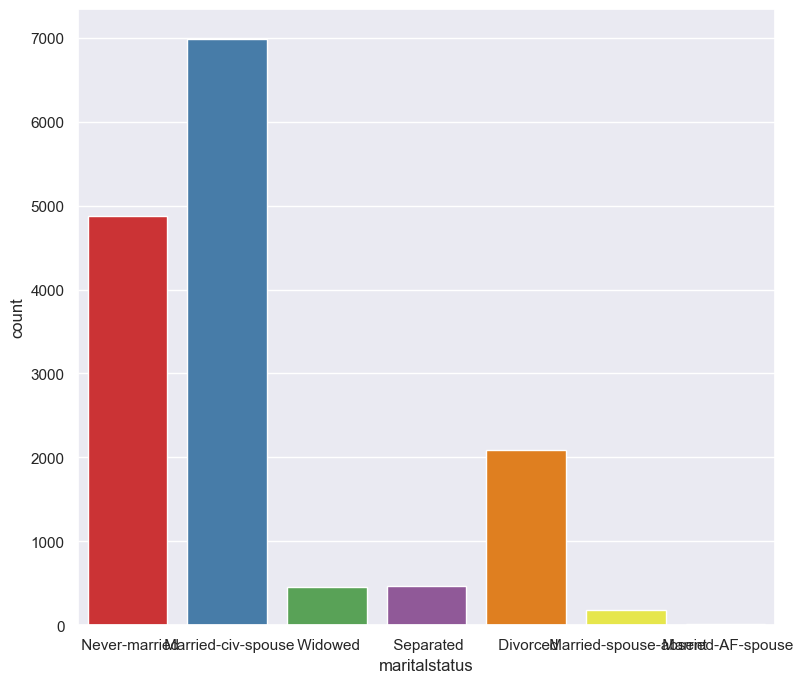

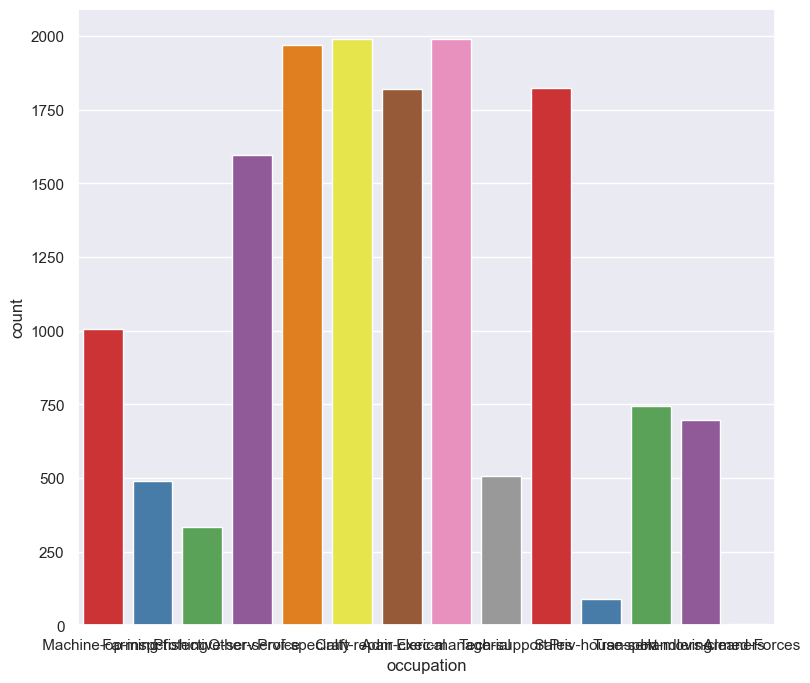

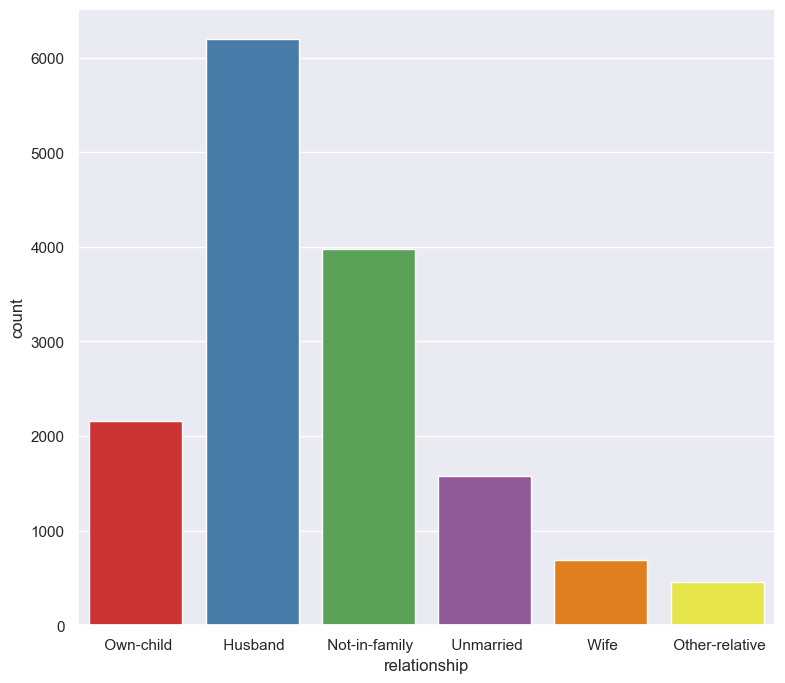

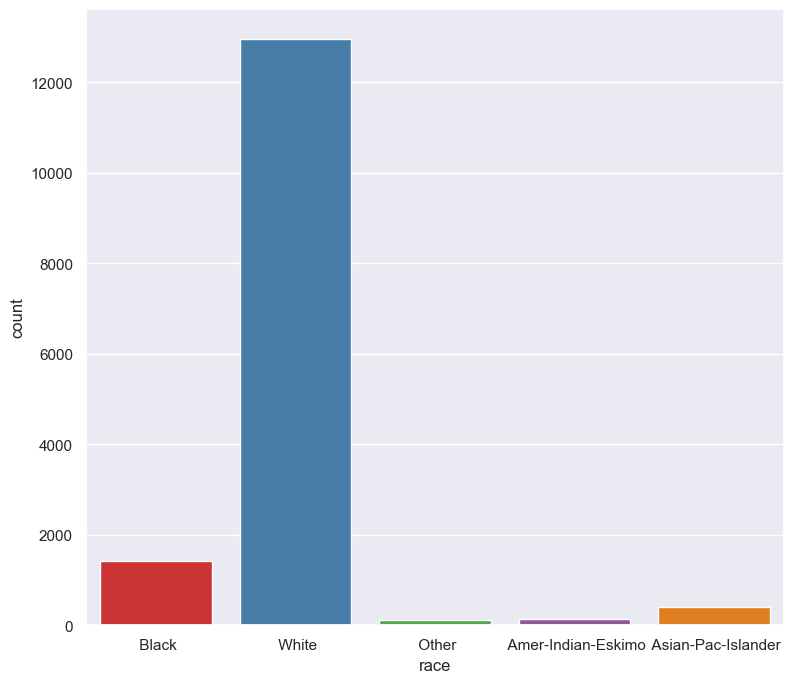

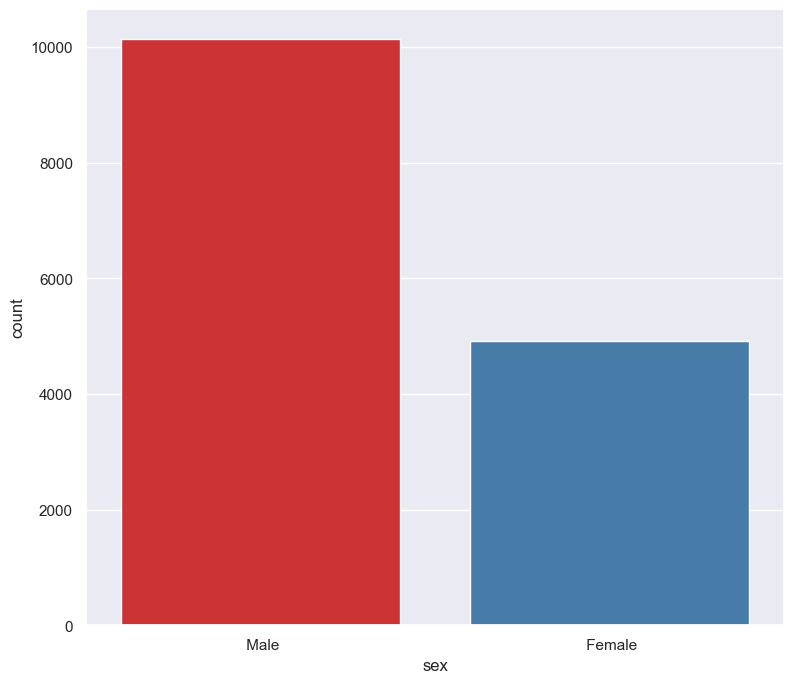

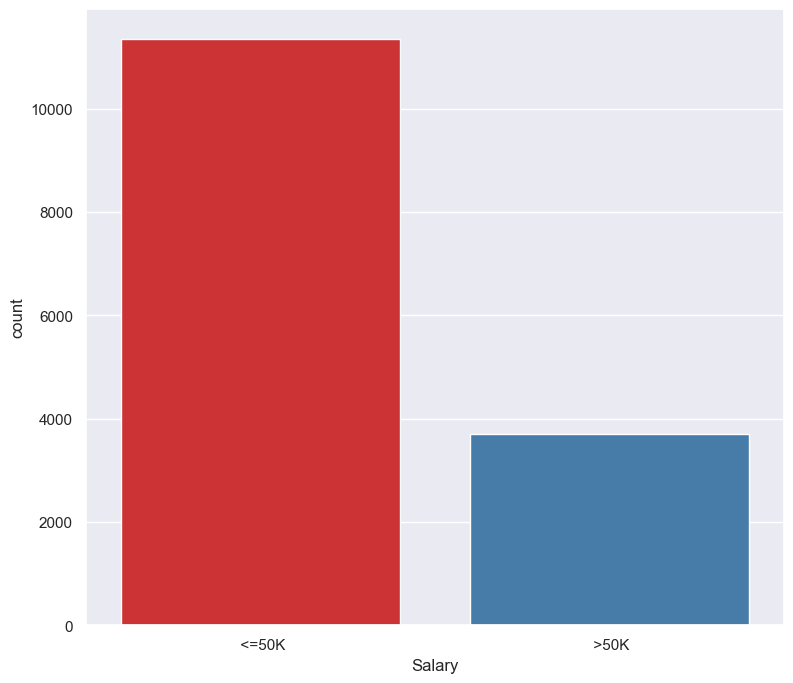

In [18]:
sns.set(rc={'figure.figsize':(9,8)})
str_column = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in str_column:
    plt.figure() 
    sns.countplot(x = col, data = salarytest_data, palette = 'Set1');

In [19]:
salary_data = pd.concat([salarytrain_data,salarytest_data], axis = 0).reset_index(drop = True)
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Correlation Analysis:-

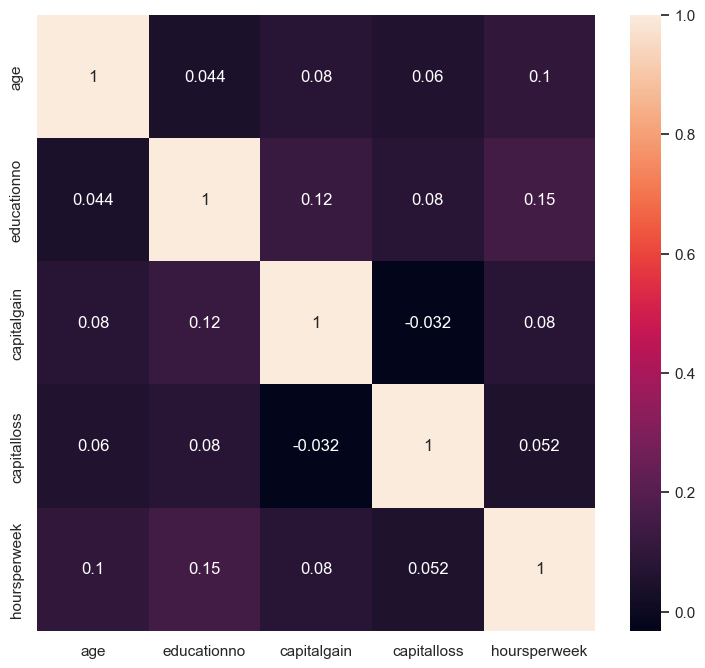

In [20]:
sns.heatmap(salarytrain_data.corr(),annot=True)
plt.show()

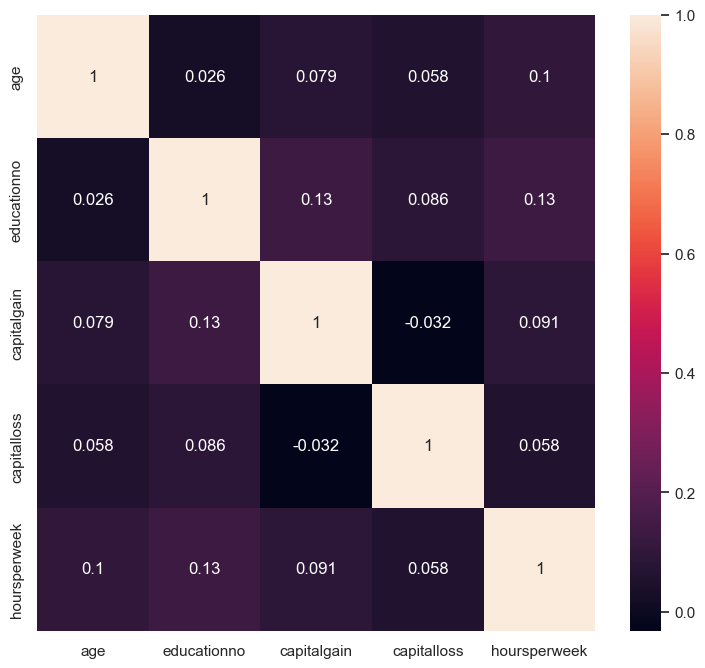

In [21]:
sns.heatmap(salarytest_data.corr(),annot=True)
plt.show()

In [22]:
train1=salarytrain_data.iloc[:,0:13]
train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [23]:
test1=salarytest_data.iloc[:,0:13]
test1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [24]:
train1=pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
test1=pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
final_train=pd.concat([train1,salarytrain_data['Salary']],axis=1)
final_train

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30157,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
30158,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
30159,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [27]:
final_test=pd.concat([test1,salarytest_data['Salary']],axis=1)
final_test

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia,Salary
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
2,28,12,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,>50K
3,44,10,7688,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,>50K
4,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15056,39,13,0,0,36,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15057,38,13,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
15058,44,13,5455,0,40,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K


In [28]:
final_train.shape

(30161, 103)

In [29]:
final_test.shape

(15060, 103)

Finding the Features and Target:-

Finding the x and y for Train Data:-

In [30]:
X = final_train.values[:,0:102]
Y = final_train.values[:,102]

Finding the x and y for Test Data:-

In [31]:
x = final_test.values[:,0:102]
y = final_test.values[:,102]

Multinomial Naive Bayes:-

In [32]:
classifier_mb = MB()
classifier_mb.fit(X,Y)
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)

test_pred_m = classifier_mb.predict(X)
accuracy_test_m = np.mean(test_pred_m==Y)

In [33]:
print('Training accuracy is:',accuracy_train_m,'\n','Testing accuracy is:',accuracy_test_m)

Training accuracy is: 0.7729186698053778 
 Testing accuracy is: 0.7729186698053778


Gaussian Naive Bayes:-

we need to convert fitdf into array format which is compatible for gaussian naive bayes.

In [34]:
classifier_gb = GB()
classifier_gb.fit(X,Y) 
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)

test_pred_g = classifier_gb.predict(X)
accuracy_test_g = np.mean(test_pred_g==Y)

In [35]:
print('Training accuracy is:',accuracy_train_g,'\n','Testing accuracy is:',accuracy_test_g)

Training accuracy is: 0.8031563940187659 
 Testing accuracy is: 0.8031563940187659
